In [2]:
import IPython.display
from IPython.display import Audio
import pandas
from pandas import DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import librosa



# Input Data Files

In [3]:
def to1hot(row):
    one_hot = np.zeros(2)
    one_hot[row]=1.0
    return one_hot

ds["one_hot_encoding"] = ds.target.apply(to1hot)

print(ds["one_hot_encoding"][125])
print(ds["target"][125])

[ 0.  1.]
1


In [4]:
#audiofile
#print(ds["data"][0].shape)
y, sr = librosa.core.load("tg1.wav", sr = 44100)
y2, sr = librosa.core.load("tg2.wav", sr = 44100)
y3, sr = librosa.core.load("tg3.wav", sr = 44100)
y4, sr = librosa.core.load("soundeffects.wav", sr = 44100)
#print(segment[100:2000])
a=[1.900000,3.424000,6.463000,9.244000,10.134000,11.223000,12.470000,14.578000,16.339582,17.220000,18.655000,20.348000,21.981000,24.405000,25.02900]
b=[8.029, 8.253, 9.029, 9.642, 9.784, 11.546, 12.136, 12.33, 12.48, 12.562, 20.717, 21.464, 21.681, 22.726, 34.123, 35.706, 35.96, 53.13
]
c=[3.168857,5.475,5.976,6.323,6.705,7.2,13.141,13.722,14.33,14.57,15.16,15.438,15.895,23.245163,23.394,25.73,26.418,26.608,27.124,34.019,34.949,56.989,57.792,58.646,59.888,60.932,61.631,62.156,63.007,64.409,65.144,66.048,66.89,67.578,68.425,69.196,70.109,70.818,76.355,77.238,78.551,79.079,79.331,79.743,80.511,81.104,81.777,83.066,83.709,84.45,86.028,86.597,88.473,89.134,89.549,90.023,90.868,91.414,91.734,91.935,98.89,99.322,101.154
]
d=list(range(1,70))
#print(d)
df = DataFrame(np.empty(165, dtype=[('data', 'object'), ('target', 'int64'), ('mels', 'object'), ('mfcc', 'object'), ('one_hot_encoding', 'object')]))


for i in range(len(a)):
    df.set_value(i, 'data', y[int(a[i]*sr):int((a[i]+1)*sr)])
    df.set_value(i,'target', 1)
    df.set_value(i, 'mels',librosa.feature.melspectrogram(y=y[int(a[i]*sr):int((a[i]+1)*sr)], n_mels=128, sr=44100,  fmax=10000))
    df.set_value(i, 'mfcc', librosa.feature.mfcc(y=y[int(a[i]*sr):int((a[i]+1)*sr)], sr=44100, fmax=10000))
    df.set_value(i,'one_hot_encoding',np.array([0.0,1.0]))
for i in range(len(b)):
    df.set_value(i+15, 'data', y2[int(b[i]*sr):int((b[i]+1)*sr)])
    df.set_value(i+15,'target', 1)
    df.set_value(i+15, 'mels',librosa.feature.melspectrogram(y=y2[int(b[i]*sr):int((b[i]+1)*sr)], n_mels=128, sr=44100,  fmax=10000))
    df.set_value(i+15, 'mfcc', librosa.feature.mfcc(y=y2[int(b[i]*sr):int((b[i]+1)*sr)], sr=44100, fmax=10000))
    df.set_value(i+15,'one_hot_encoding',np.array([0.0,1.0]))
for i in range(len(c)):
    df.set_value(i+33, 'data', y3[int(c[i]*sr):int((c[i]+1)*sr)])
    df.set_value(i+33,'target', 1)
    df.set_value(i+33, 'mels',librosa.feature.melspectrogram(y=y3[int(c[i]*sr):int((c[i]+1)*sr)], n_mels=128, sr=44100,  fmax=10000))
    df.set_value(i+33, 'mfcc', librosa.feature.mfcc(y=y3[int(c[i]*sr):int((c[i]+1)*sr)], sr=44100, fmax=10000))
    df.set_value(i+33,'one_hot_encoding',np.array([0.0,1.0]))
    
for i in range(len(d)):
    df.set_value(i+96, 'data', y4[int(d[i]*sr):int((d[i]+1)*sr)])
    df.set_value(i+96,'target', 0)
    df.set_value(i+96, 'mels',librosa.feature.melspectrogram(y=y4[int(d[i]*sr):int((d[i]+1)*sr)], n_mels=128, sr=44100,  fmax=10000))
    df.set_value(i+96, 'mfcc', librosa.feature.mfcc(y=y4[int(d[i]*sr):int((d[i]+1)*sr)], sr=44100, fmax=10000))
    df.set_value(i+96,'one_hot_encoding',np.array([1.0,0.0]))
#print(len(a)+len(b)+len(c)+len(d))
#print(df)
##IPython.display.display(IPython.display.Audio(data=segment, rate=sr))

#print(ds['one_hot_encoding'])
ds=df.sample(frac=1)




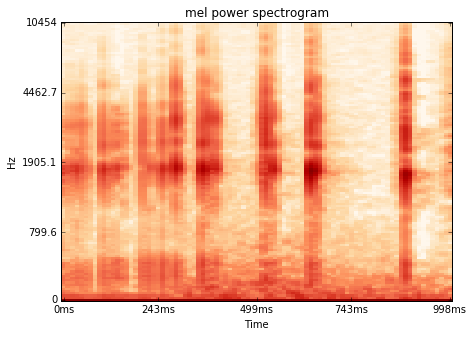

In [131]:

plt.figure(figsize=(7,5))
#melspec=librosa.display.specshow(ds.iloc[61]["data"],sr=44100,x_axis='time', y_axis='frequency')
log_S = librosa.logamplitude(ds.iloc[61]["mels"], ref_power=np.max)
melspec=librosa.display.specshow(log_S,sr=44100,x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
IPython.display.display(IPython.display.Audio(data=ds.iloc[61]["data"], rate=44100))

In [132]:
#print(ds["one_hot_encoding"][125])
#print(ds["target"][125])

In [133]:
#print(ds.mels)

In [134]:
#print("This is the error rate if we always guess the majority: %.2f" % \
#(min(ds[ds["target"] == 0].index.size, ds[ds["target"] == 1].index.size) / (float)(ds.index.size)))

### Randomly selecting validation, test and training sets.

In [10]:
ds["mels_flatten"] = ds.mels.apply(lambda mels: mels.flatten())
print(type(ds.iloc[10]["mels"]))
train_data = ds[0:140]
validation_data = ds[141:153]
test_data = ds[154:]

<class 'numpy.ndarray'>


In [136]:
train_x = np.vstack(train_data.mels_flatten).reshape(train_data.shape[0],128, 87,1).astype(np.float32)
train_y = np.vstack(train_data["one_hot_encoding"])
train_size = train_y.shape[0]
validation_x = np.vstack(validation_data.mels_flatten).reshape(validation_data.shape[0],128, 87,1).astype(np.float32)
validation_y = np.vstack(validation_data["one_hot_encoding"])
test_x = np.vstack(test_data.mels_flatten).reshape(test_data.shape[0],128, 87,1).astype(np.float32)
test_y = np.vstack(test_data["one_hot_encoding"])

### Define the model

In [137]:
import tensorflow as tf
BATCH_SIZE = 140 # we have so little data, just set the batch size to the entire training set
NUM_CHANNELS = 1 
NUM_LABELS = 2
INPUT_SHAPE = (128,87)


# This node is where we feed a batch of the training data and labels at each training step


with tf.name_scope("inputs"):
    train_data_node = tf.placeholder(tf.float32,shape=(BATCH_SIZE, INPUT_SHAPE[0], INPUT_SHAPE[1], 1), name='x_inputs')
    train_labels_node = tf.placeholder(tf.float32, shape=(BATCH_SIZE, NUM_LABELS), name='y_inputs')


# constants for validation and tests
validation_data_node = tf.constant(validation_x)
test_data_node = tf.constant(test_x)

In [138]:
with tf.name_scope("weights"):
    conv1_weights = tf.Variable(
        tf.truncated_normal([2, 8, 1, 32], 
        stddev=0.1, 
        seed=SEED, name='conv1_weights'))
with tf.name_scope("biases"):
    conv1_biases = tf.Variable(tf.zeros([32]), name='b') 

with tf.name_scope("weights2"):
    conv2_weights = tf.Variable(
        tf.truncated_normal([30, 8, 32, 64], 
        stddev=0.1, 
        seed=SEED), name='conv2_weights')
    
with tf.name_scope("biases"):
    conv2_biases = tf.Variable(tf.constant(0.1, shape=[64]), name='b2')


fc1_weights = tf.Variable(
    tf.truncated_normal([48 * 64, 512], stddev=0.1, seed=SEED))
fc1_biases = tf.Variable(tf.constant(0.1, shape=[512]))

fc2_weights = tf.Variable(
    tf.truncated_normal([512, NUM_LABELS], stddev=0.1, seed=SEED))
fc2_biases = tf.Variable(tf.constant(0.1, shape=[NUM_LABELS]))
print ('done')

done


In [139]:
def model(data, train=False):
    
    with tf.name_scope("layer1"):
        conv = tf.nn.conv2d(data,conv1_weights,strides=[1, 2, 2, 1], padding='SAME')
        relu = tf.nn.relu(tf.nn.bias_add(conv, conv1_biases))
        pool = tf.nn.max_pool(relu,ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],padding='SAME')
    with tf.name_scope("layer2"): 
        conv = tf.nn.conv2d(pool,conv2_weights, strides=[1, 2, 2, 1], padding='SAME')
        relu = tf.nn.relu(tf.nn.bias_add(conv, conv2_biases))
        pool = tf.nn.max_pool(relu, ksize=[1, 2, 2, 1],  strides=[1, 2, 2, 1], padding='SAME')


    pool_shape = pool.get_shape().as_list()
    with tf.name_scope("reshaped_layer"):
        reshape = tf.reshape(pool, [pool_shape[0], pool_shape[1] * pool_shape[2] * pool_shape[3]], name='reshaped')

    hidden = tf.nn.relu(tf.matmul(reshape, fc1_weights) + fc1_biases)
    with tf.name_scope("Layer3"):
        if train:
            hidden = tf.nn.dropout(hidden, 0.5)

        return tf.matmul(hidden, fc2_weights) + fc2_biases

In [140]:
# Training computation: logits + cross-entropy loss.
logits = model(train_data_node, True)
with tf.name_scope('Cost'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
      logits, train_labels_node), name='Cost')
    tf.summary.scalar("cost", loss)

# L2 regularization for the fully connected parameters.
regularizers = (tf.nn.l2_loss(fc1_weights) + tf.nn.l2_loss(fc1_biases) +
                tf.nn.l2_loss(fc2_weights) + tf.nn.l2_loss(fc2_biases))
# Add the regularization term to the loss.
loss += 5e-4 * regularizers

# Optimizer: set up a variable that's incremented once per batch and
# controls the learning rate decay.
batch = tf.Variable(0)
# Decay once per epoch, using an exponential schedule starting at 0.01.
learning_rate = tf.train.exponential_decay(
  0.01,                # Base learning rate.
  batch * BATCH_SIZE,  # Current index into the dataset.
  train_size,          # Decay step.
  0.99,                # Decay rate.
  staircase=True)
# Use simple momentum for the optimization.
with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate,
                                           0.9).minimize(loss,
                                                         global_step=batch)

# Predictions for the minibatch, validation set and test set.
train_prediction = tf.nn.softmax(logits)
# We'll compute them only once in a while by calling their {eval()} method.
validation_prediction = tf.nn.softmax(model(validation_data_node))
test_prediction = tf.nn.softmax(model(test_data_node))

print ('Done')

Done


# Training

In [141]:
# Create a new interactive session that we'll use in
# subsequent code cells.
s = tf.InteractiveSession()
#tf.summary.histogram("w1_h_summ",conv1_weights)
#tf.summary.histogram("w2_h_summ",conv2_weights)
writer=tf.train.SummaryWriter("logs/",s.graph)
#merged=tf.tf.summary.merge_all()

# Use our newly created session as the default for 
# subsequent operations.
s.as_default()

# Initialize all the variables we defined above.
#tf.initialize_all_variables().run()
tf.global_variables_initializer().run()

Instructions for updating:
Please switch to tf.summary.FileWriter. The interface and behavior is the same; this is just a rename.


In [142]:
def error_rate(predictions, labels):
    # We use argmax to convert prediction probabilities into 1-hot encoding and compare it against the labels
    correct = np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
    total = predictions.shape[0]

    error = 100.0 - (100 * float(correct) / float(total))

    confusions = np.zeros([NUM_LABELS, NUM_LABELS], np.float32)

    bundled = zip(np.argmax(predictions, 1), np.argmax(labels, 1))
    for predicted, actual in bundled:
        confusions[predicted, actual] += 1
    return error, confusions

print ('Done')

Done


In [143]:

for i in range(200):


    offset = 0 #(step * BATCH_SIZE) % (train_size - BATCH_SIZE)
    batch_data = train_x[offset:(offset + BATCH_SIZE), :, :, :]
    batch_labels = train_y[offset:(offset + BATCH_SIZE)]
    # This dictionary maps the batch data (as a numpy array) to the
    # node in the graph it should be fed to.
    feed_dict = {train_data_node: batch_data,
               train_labels_node: batch_labels}
    # Run the graph and fetch some of the nodes.
    _, l, lr, predictions = s.run(
    [optimizer, loss, learning_rate, train_prediction],
    feed_dict=feed_dict)

      # Print out the loss periodically.
    if i % 20 == 0:
        error, _ = error_rate(predictions, batch_labels)
        print ('Mini-batch loss: %.5f Error: %.5f Learning rate: %.5f' % (l, error, lr))
        print ('Validation error: %.5f' % error_rate(
            validation_prediction.eval(), validation_y)[0])


Mini-batch loss: 57.43328 Error: 62.14286 Learning rate: 0.01000
Validation error: 58.33333
Mini-batch loss: 3.68736 Error: 10.71429 Learning rate: 0.00818
Validation error: 0.00000
Mini-batch loss: 3.50728 Error: 3.57143 Learning rate: 0.00669
Validation error: 0.00000
Mini-batch loss: 3.43784 Error: 2.14286 Learning rate: 0.00547
Validation error: 0.00000
Mini-batch loss: 3.41794 Error: 1.42857 Learning rate: 0.00448
Validation error: 0.00000
Mini-batch loss: 3.41406 Error: 2.14286 Learning rate: 0.00366
Validation error: 0.00000
Mini-batch loss: 3.39829 Error: 1.42857 Learning rate: 0.00299
Validation error: 0.00000
Mini-batch loss: 3.38035 Error: 0.00000 Learning rate: 0.00245
Validation error: 0.00000
Mini-batch loss: 3.37454 Error: 0.00000 Learning rate: 0.00200
Validation error: 0.00000
Mini-batch loss: 3.37240 Error: 0.00000 Learning rate: 0.00164
Validation error: 0.00000


Test error: 0.00000


In [145]:
def show_sample(i):
    print (i, test_data.iloc[i]["target"])
    IPython.display.display(IPython.display.Audio(data=test_data.iloc[i]["data"], rate=44100))
    
res = np.argmax(test_prediction.eval(),1) == np.argmax(test_y, 1)
right = []
wrong = []
for i, v in enumerate(res.tolist()):
    if v:
        right.append(i)
    else:
        wrong.append(i)

#These are the samples our model got incorrect
print("Wrong Predictions:")
for w in wrong:
    show_sample(w)
print("Correct Predictions:")    
for r in right:
    show_sample(r)

Wrong Predictions:
Correct Predictions:
0 1


1 0


2 0


3 0


4 0


5 1


6 1


7 1


8 0


9 0


10 1


# TensorBoard

In [146]:
# tensorBoard =tf.summary();
# labeling each node